(omero.io.read_and_write)=
# Read and write data to OMERO from Python

This tutorial will show a few simple ways to read and load data from and to a remote OMERO server using Python. For this purpose, we will use primarily the [ezomero](https://pypi.org/project/ezomero/) library, which is a Python wrapper around the OMERO API. Needless to say, that'll have to be installed first:

```bash
conda install ezomero scikit-image numpy -c bioconda
```

In [72]:
import ezomero
from omero.plugins.tag import TagControl
import numpy as np
from skimage import io
import matplotlib.pyplot as plt

The first thing we always need to do when working with omero from code: We need to connect to the server. Ezomero provides a simple way to do this.

```{note}
Before connecting, you may have to connect to the VPN of your institution if you are not on the same network as the OMERO server.
```

In [28]:
host = 'omero-int.biotec.tu-dresden.de'
user = 'my-user-name'  # replace this with your username
secure = True
port = 4064
group = 'default'

conn = ezomero.connect(host=host, user=user, secure=secure, port=port, group=group)

...and you are connected. Note that there may be an idle timeout in place for the connection. This means, that if you do not send or receive data from the server within a given period, the connection will reset and you will have to reconnect. This is not a problem, but it is something to keep in mind.

## Upoading data to OMERO

Let's first talk about uploading. ezomero provides two general ways to do it and both have their advantages and disadvantages. In this tutorial, we only conver one in greater detail. The two options are:

- [`ezomero.post_image`](https://thejacksonlaboratory.github.io/ezomero/ezomero.html#ezomero.post_image) - allows you to upload an image which you have to read into memory first.
- [`ezomero.ezimport`](https://thejacksonlaboratory.github.io/ezomero/ezomero.html#ezomero.ezimport) - allows you to upload an image directly from a file on disk.

In this tutorial, we will focus on the first option. The second option is more efficient for large files, but it is also more complex to use and currentlly not recommended as it has not seen much testing.

In [3]:
image = np.random.random((64, 64, 64))

Here we directly need to watch out. OMERO *always* requires data to be passed in 5D, with the five dimensions referring to time, channel and z/y/x. You can add singleton dimensions which won't make your data any larger like this:

In [4]:
image_5d = image[None, None, :]
image_5d.shape

(1, 1, 64, 64, 64)

In [5]:
image_id = ezomero.post_image(
    conn=conn,
    image=image_5d,
    image_name='test_array',
    description='An array to demonstrate omero',
    dim_order='tczyx')

And there's your data. You can see that what we set as the description further up now shows up on the server.

![Uploaded image](./imgs/capture.png)

## Reading data from OMERO

Reading data from OMERO is similarly easy. ezomero provides the `get_image` function which allows you to download an image from the server. The function returns a numpy array and a metadata object. Again, you see that we get the resulting image with all previously added empty dimensions, which we need to account for when we handle it.


In [73]:
metadata, image = ezomero.get_image(conn, image_id=image_id, no_pixels=False, dim_order='tczyx')
image.shape

(1, 1, 64, 64, 64)

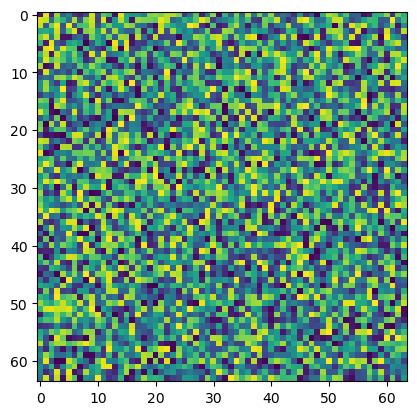

In [74]:
plt.imshow(image.squeeze()[32, :, :])